I did this a bit flippantly before, but I want to fomalize the process by which we estimate the uncertainty on emulator predictions. 

In [52]:
from pearce.emulator import NashvilleHot
from GPy.kern import *
import numpy as np
from os import path

In [53]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [54]:
'/scratch/users/swmclau2/xi_gg'

'/scratch/users/swmclau2/xi_gg'

In [69]:
training_file = '/scratch/users/swmclau2/xi_gg_zheng07_v5/PearceXiggCosmo.hdf5'
test_file = '/scratch/users/swmclau2/xi_gg_zheng07_cosmo_test_v4/PearceXiggCosmoTest.hdf5'

In [70]:
em_method = 'gp'

In [71]:
fixed_params = {'z':0.0}

In [72]:
emu = NashvilleHot(training_file, hyperparams={},fixed_params = fixed_params, downsample_factor = 0.2)

In [73]:
pred_y, data_y = emu.goodness_of_fit(test_file, downsample_factor= 0.05, statistic = None)

In [74]:
data_y.shape

(18, 7000)

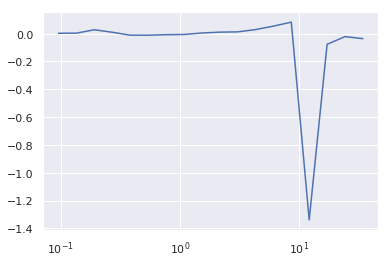

In [75]:
i = 3000
plt.plot(emu.scale_bin_centers, (data_y[:,i]-pred_y[:,i])/(data_y[:,i]))
#plt.plot(emu.scale_bin_centers, pred_y[:,i])
plt.xscale('log')
plt.show()

(0.0, 0.2)

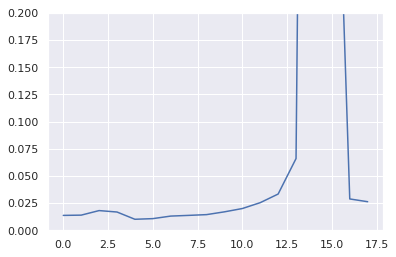

In [76]:
plt.plot( ((pred_y - data_y)/np.abs(data_y)).mean(axis =1) )
plt.ylim([0.0, 0.2])

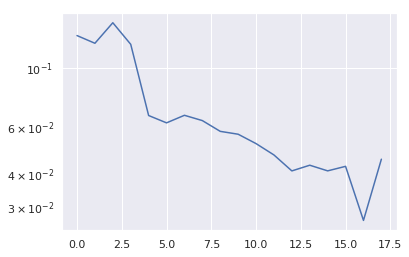

In [77]:
plt.plot( (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1) )
plt.yscale('log')

In [27]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha',
 'conc_gal_bias']